<h2><center>Описание</center></h2>

Документ Data_2 содержит следующие столбцы:
- appsflyer_id - уникальный идентификатор установки (юзера). Так же соответствует последующей внутриигровой активности данного юзера
- media_source - источник (рекламная сеть), который привлек юзера в игру
- site_id - подисточник внутри источника (media_source), который привлек юзера в игру
- campaign - наименование рекламной компании
- event_name - наименование внутриигрового ивента, выполненного юзером.
- event_name имеет следующие значения: 
 - event_name=install - факт установки
 - level_reached_3 - достижение юзером 3-го уровня в игре
 - level_reached_5 - достижение юзером 5-го уровня в игре
 - NPU - факт внутриигровой покупки юзером.


<h2><center>Задание</center></h2>

Необходимо: 
- сделать агрегированную таблицу по пост-инстальной активности юзеров в следующей группировке когорт: media_source/site_id/campaign. 
- После чего, отметьте те когорты (media_source/site_id/campaign), которые по вашему мнению являются фродовыми (имеют явные аномалии в пост-инстальной активности от остальных когорт). Обоснуйте ваше решение.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
#Читаем данные
data2 = pd.read_excel("Data_2 (+).xlsx") #, index_col = 'appsflyer_id'
data2.head()

,appsflyer_id,media_source,site_id,campaign,event_name
0,1544397823113-6896177808779237826,Adstarter,JohnyHand,Playcom_DE_w1,install
1,1544397823113-6896177808779237826,Adstarter,JohnyHand,Playcom_DE_w1,level_reached_3
2,1544397823113-6896177808779237826,Adstarter,JohnyHand,Playcom_DE_w1,level_reached_3
3,1544397823113-6896177808779237826,Adstarter,JohnyHand,Playcom_DE_w1,level_reached_5
4,1544397823113-6896177808779237826,Adstarter,JohnyHand,Playcom_DE_w1,level_reached_5


In [3]:
#Количество уникальных id
data2.appsflyer_id.nunique()

28441

In [4]:
#Разбиваем категориальные столбец event_name с категориальными переменными на 4 столбца
categorial_transform = pd.get_dummies(data2.event_name)
data2_categor = data2.join(categorial_transform)

In [5]:
data2_categor.head()

,appsflyer_id,media_source,site_id,campaign,event_name,NPU,install,level_reached_3,level_reached_5
0,1544397823113-6896177808779237826,Adstarter,JohnyHand,Playcom_DE_w1,install,0,1,0,0
1,1544397823113-6896177808779237826,Adstarter,JohnyHand,Playcom_DE_w1,level_reached_3,0,0,1,0
2,1544397823113-6896177808779237826,Adstarter,JohnyHand,Playcom_DE_w1,level_reached_3,0,0,1,0
3,1544397823113-6896177808779237826,Adstarter,JohnyHand,Playcom_DE_w1,level_reached_5,0,0,0,1
4,1544397823113-6896177808779237826,Adstarter,JohnyHand,Playcom_DE_w1,level_reached_5,0,0,0,1


In [6]:
#Дропаем уже ненужные колонки
data2_categor = data2_categor.drop(columns = ['install', 'event_name'])

In [7]:
#Смотрим что у нас по значениям в каждом столбце
for column in data2_categor.columns:
    print(column, ":", data2_categor[column].value_counts())
    print('-'*20)

appsflyer_id : 1544435958204-2089237758916941886    12
1543693314732-504493412527213586     10
1544304786783-6829099661148205457     9
1544354480490-5821100190665676137     9
1544063804561-1359376720427988207     9
                                     ..
1544414826343-1747820022032084568     1
1543992301980-4585771934105313953     1
1544258307047-4461982167482004234     1
1544288949741-3460397067887145479     1
1544373426391-8595064917503060452     1
Name: appsflyer_id, Length: 28441, dtype: int64
--------------------
media_source : Crossfaith    63442
Adstarter      5901
Name: media_source, dtype: int64
--------------------
site_id : Distortion_1887_24598                               1959
Estrada                                             1903
NexxuzHD                                            1729
Rosenborg_109065_40356                              1524
BigTacty_69708                                      1517
                                                    ... 
Estrada__855-02

In [8]:
data2_categor['media_source'].value_counts()

Crossfaith    63442
Adstarter      5901
Name: media_source, dtype: int64

In [9]:
data2_categor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69343 entries, 0 to 69342
Data columns (total 7 columns):
appsflyer_id       69343 non-null object
media_source       69343 non-null object
site_id            69343 non-null object
campaign           69343 non-null object
NPU                69343 non-null uint8
level_reached_3    69343 non-null uint8
level_reached_5    69343 non-null uint8
dtypes: object(4), uint8(3)
memory usage: 2.3+ MB


In [10]:
data2_categor.describe()

,NPU,level_reached_3,level_reached_5
count,69343.000000,69343.000000,69343.000000
mean,0.006951,0.314855,0.268073
std,0.083083,0.464462,0.442959
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [11]:
data2_categor.nunique()

appsflyer_id       28441
media_source           2
site_id             2298
campaign              23
NPU                    2
level_reached_3        2
level_reached_5        2
dtype: int64


<h2>Построим гистограммы количества совершённой активности пользователями в зависимости от принадлежности к тому или иному media_source</h2>

Сделаем 2 таблицы
data_group_media_more_0 - с пользователями, где указано, была ли у них хотя бы 1 активность одного из видов активности
data_group_sum - с суммарной активностью по каждому виду для каждого пользователям
А после - построим гистограммы с отношением активности к общему числу пользователей

In [12]:
#Групируем по media_source и id, считаем сумму всех NPU, level_reached_3, level_reached_5 для каждого из id
data_group_media = data2_categor.groupby(['media_source', 'appsflyer_id'])\
.aggregate({'NPU': 'sum', 'level_reached_3': 'sum', 'level_reached_5':'sum'})

In [13]:
data_group_media

NPU  level_reached_3  \
media_source appsflyer_id                                              
Adstarter    1543127984528-6940691891530490548    0                0   
             1543531503450-1251015439893629029    0                0   
             1543615592373-3385887950166968577    0                2   
             1543618281886-4076348101088745884    0                1   
             1543625244036-5332934591899282871    0                0   
...                                             ...              ...   
Crossfaith   1546525436304-7290747470610023485    0                0   
             1547237344464-4158114377678420125    0                2   
             1547395987626-2574423648959027143    0                2   
             1547688430117-3130938844239942085    0                2   
             1619800928862-4768244534901173965    0                2   

                                                level_reached_5  
media_source appsflyer_id                                        
Adstarter    1543127984528-6940691891530490548                0  
             1543531503450-1251015439893629029                0  
             1543615592373-3385887950166968577                2  
             1543618281886-4076348101088745884                1  
             1543625244036-5332934591899282871                0  
...                                                         ...  
Crossfaith   1546525436304-7290747470610023485                0  
             1547237344464-4158114377678420125                0  
             1547395987626-2574423648959027143                2  
             1547688430117-3130938844239942085                2  
             1619800928862-4768244534901173965                0  

[28441 rows x 3 columns]

In [14]:
# data_group_media

In [15]:
data_group_media_more_0 = pd.DataFrame()

In [16]:
#столбцы с more_0 означают, что количество действий определённого события больше 0
data_group_media_more_0['NPU_more_0'] = data_group_media['NPU'].apply(lambda x: int(x > 1))
data_group_media_more_0['level_reached_3_more_0'] = data_group_media['level_reached_3'].apply(lambda x: int(x > 1))
data_group_media_more_0['level_reached_5_more_0'] = data_group_media['level_reached_5'].apply(lambda x: int(x > 1))


In [17]:
#Статистика по совершению хотя бы одного вида активности
data_group_media_more_0

NPU_more_0  \
media_source appsflyer_id                                    
Adstarter    1543127984528-6940691891530490548           0   
             1543531503450-1251015439893629029           0   
             1543615592373-3385887950166968577           0   
             1543618281886-4076348101088745884           0   
             1543625244036-5332934591899282871           0   
...                                                    ...   
Crossfaith   1546525436304-7290747470610023485           0   
             1547237344464-4158114377678420125           0   
             1547395987626-2574423648959027143           0   
             1547688430117-3130938844239942085           0   
             1619800928862-4768244534901173965           0   

                                                level_reached_3_more_0  \
media_source appsflyer_id                                                
Adstarter    1543127984528-6940691891530490548                       0   
             1543531503450-1251015439893629029                       0   
             1543615592373-3385887950166968577                       1   
             1543618281886-4076348101088745884                       0   
             1543625244036-5332934591899282871                       0   
...                                                                ...   
Crossfaith   1546525436304-7290747470610023485                       0   
             1547237344464-4158114377678420125                       1   
             1547395987626-2574423648959027143                       1   
             1547688430117-3130938844239942085                       1   
             1619800928862-4768244534901173965                       1   

                                                level_reached_5_more_0  
media_source appsflyer_id                                               
Adstarter    1543127984528-6940691891530490548                       0  
             1543531503450-1251015439893629029                       0  
             1543615592373-3385887950166968577                       1  
             1543618281886-4076348101088745884                       0  
             1543625244036-5332934591899282871                       0  
...                                                                ...  
Crossfaith   1546525436304-7290747470610023485                       0  
             1547237344464-4158114377678420125                       0  
             1547395987626-2574423648959027143                       1  
             1547688430117-3130938844239942085                       1  
             1619800928862-4768244534901173965                       0  

[28441 rows x 3 columns]

In [18]:
num_adstarter_id = data_group_media_more_0.loc['Adstarter'].shape[0]
num_crossfaith_id = data_group_media_more_0.loc['Crossfaith'].shape[0]

In [19]:
#Количество уникальных id по media_source
(num_adstarter_id, num_crossfaith_id)

(2003, 26438)

In [20]:
data_group_media_more_0.describe()

,NPU_more_0,level_reached_3_more_0,level_reached_5_more_0
count,28441.000000,28441.000000,28441.000000
mean,0.008122,0.290391,0.269470
std,0.089757,0.453951,0.443692
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [21]:
more_0 = data_group_media_more_0.groupby(['media_source']).sum()

In [22]:
more_0['num_unique_id'] = np.array([num_adstarter_id, num_crossfaith_id])

In [23]:
more_0

,NPU_more_0,level_reached_3_more_0,level_reached_5_more_0,num_unique_id
media_source,,,,
Adstarter,13,738,803,2003
Crossfaith,218,7521,6861,26438


In [24]:
more_0_percent = more_0.apply(lambda x: round(x/more_0['num_unique_id'], 4)).drop(columns = 'num_unique_id')

In [25]:
more_0_percent

,NPU_more_0,level_reached_3_more_0,level_reached_5_more_0
media_source,,,
Adstarter,0.0065,0.3684,0.4009
Crossfaith,0.0082,0.2845,0.2595


In [26]:
#Статистика для id с суммами каждого вида активности
sum_activity = data_group_media

In [27]:
#Колонка, обозначающая была ли вообще активность у пользователя
data_group_media['no_activity'] = \
(data_group_media['NPU'] + data_group_media['level_reached_3'] + data_group_media['level_reached_5']) == 0

In [28]:
data_group_media['no_activity'] = data_group_media['no_activity'].apply(lambda x: int(x))

In [29]:
data_group_media

NPU  level_reached_3  \
media_source appsflyer_id                                              
Adstarter    1543127984528-6940691891530490548    0                0   
             1543531503450-1251015439893629029    0                0   
             1543615592373-3385887950166968577    0                2   
             1543618281886-4076348101088745884    0                1   
             1543625244036-5332934591899282871    0                0   
...                                             ...              ...   
Crossfaith   1546525436304-7290747470610023485    0                0   
             1547237344464-4158114377678420125    0                2   
             1547395987626-2574423648959027143    0                2   
             1547688430117-3130938844239942085    0                2   
             1619800928862-4768244534901173965    0                2   

                                                level_reached_5  no_activity  
media_source appsflyer_id                                                     
Adstarter    1543127984528-6940691891530490548                0            1  
             1543531503450-1251015439893629029                0            1  
             1543615592373-3385887950166968577                2            0  
             1543618281886-4076348101088745884                1            0  
             1543625244036-5332934591899282871                0            1  
...                                                         ...          ...  
Crossfaith   1546525436304-7290747470610023485                0            1  
             1547237344464-4158114377678420125                0            0  
             1547395987626-2574423648959027143                2            0  
             1547688430117-3130938844239942085                2            0  
             1619800928862-4768244534901173965                0            0  

[28441 rows x 4 columns]

In [30]:
data_group_media_sum= data_group_media.groupby(['media_source']).sum()

In [31]:
data_group_media_sum['sum_activity'] = \
data_group_media_sum['NPU'] + data_group_media_sum['level_reached_3'] + data_group_media_sum['level_reached_5']

In [32]:
data_group_media_sum

,NPU,level_reached_3,level_reached_5,no_activity,sum_activity
media_source,,,,,
Adstarter,27.0,1943.0,1930.0,652,3900.0
Crossfaith,455.0,19890.0,16659.0,13503,37004.0


In [33]:
data_group_media_sum['num_unique_id'] = np.array([num_adstarter_id, num_crossfaith_id])

In [34]:
data_group_media_sum

,NPU,level_reached_3,level_reached_5,no_activity,sum_activity,num_unique_id
media_source,,,,,,
Adstarter,27.0,1943.0,1930.0,652,3900.0,2003
Crossfaith,455.0,19890.0,16659.0,13503,37004.0,26438


In [35]:
sum_activity_percent = pd.DataFrame()

In [36]:
sum_activity_percent = data_group_media_sum.apply(lambda x: round(x/data_group_media_sum['num_unique_id'], 3))

In [37]:
sum_activity_percent = sum_activity_percent.drop(columns = 'num_unique_id')

In [38]:
sum_activity_percent

,NPU,level_reached_3,level_reached_5,no_activity,sum_activity
media_source,,,,,
Adstarter,0.013,0.970,0.964,0.326,1.947
Crossfaith,0.017,0.752,0.630,0.511,1.400


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
def plot_hist(dataframe, title):

    labels = dataframe.columns
    Adstarter_values = dataframe[labels].iloc[0]
    Crossfaith_values = dataframe[labels].iloc[1]

    x = np.arange(len(labels))
    width = 0.35  

    fig, ax = plt.subplots()

    rects1 = ax.bar(x - width/2, Adstarter_values, width, label='Adstarter')
    rects2 = ax.bar(x + width/2, Crossfaith_values, width, label='Crossfaith')

    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 0), 
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.plot();

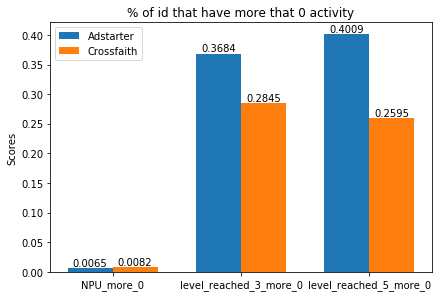

In [41]:
plot_hist(more_0_percent, '% of id that have more that 0 activity')

Видим, что в случае Adstarter в целом активность пользователей выше по всем показателем, кроме покупок, хоть количество пользователей в по этому медиа ресурсу незначительно меньше.

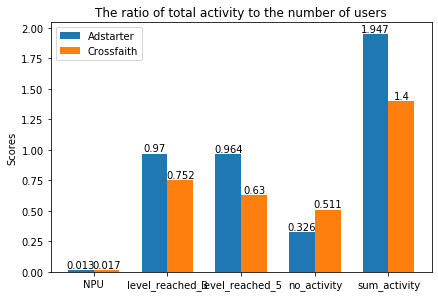

In [42]:
plot_hist(sum_activity_percent, 'The ratio of total activity to the number of users')

Очень сильно бросается то, что процент неактивных юзеров в Crossfaith гораздо больше, чем в Adstarter

<h2><center>Сделаем таблицу распределения среднего количества активностей по когортам "media_source/site_id/campaign"</center></h2>


In [43]:
group_data_count = data2.groupby(['media_source', 'site_id', 'campaign', 'appsflyer_id'], as_index = False).count()

In [44]:
group_data_count = group_data_count.rename(columns = {'event_name':'num_user_activity'})

In [45]:
group_data_count

,media_source,site_id,campaign,appsflyer_id,num_user_activity
0,Adstarter,AaronEsser,Playcom_US_w11,1543667539491-7244411862515843678,1
1,Adstarter,AaronEsser,Playcom_US_w11,1543682712096-2273780647544575536,5
2,Adstarter,AaronEsser,Playcom_US_w11,1543696987002-8817919170253514635,1
3,Adstarter,AaronEsser,Playcom_US_w11,1543747819481-3940214760510552950,4
4,Adstarter,AaronEsser,Playcom_US_w11,1543752346134-9112873296635459465,1
...,...,...,...,...,...
28436,Crossfaith,TCH_607_47_28306,WR_And_US_CPA,1543881176166-7294799236597203396,1
28437,Crossfaith,TCH_607_47_28309,WR_And_US_CPA,1543813935596-3405700343394389278,1
28438,Crossfaith,TCH_607_47_28313,WR_And_US_CPA,1543725789577-836646343682732117,5
28439,Crossfaith,TCH_607_47_28313,WR_And_US_CPA,1543826226891-7651519832492055359,1


In [46]:
group_data_count_mean = group_data_count.groupby(['media_source', 'site_id', 'campaign'], as_index = False).aggregate({'num_user_activity':'mean'})

In [47]:
group_data_count_mean

,media_source,site_id,campaign,num_user_activity
0,Adstarter,AaronEsser,Playcom_US_w11,2.142857
1,Adstarter,AliProductions,Playcom_US_w10,1.000000
2,Adstarter,Avive,Playcom_DE_w2,2.257143
3,Adstarter,B3nny,Playcom_DE_w2,2.750000
4,Adstarter,BeastyGames,Playcom_US_w10,3.208333
...,...,...,...,...
3579,Crossfaith,TCH_607_47_28304,WR_And_US_CPA,2.666667
3580,Crossfaith,TCH_607_47_28306,WR_And_US_CPA,2.000000
3581,Crossfaith,TCH_607_47_28309,WR_And_US_CPA,1.000000
3582,Crossfaith,TCH_607_47_28313,WR_And_US_CPA,3.000000


In [48]:
group_data_count_mean = group_data_count_mean.rename(columns = {'num_user_activity':'mean_user_activity'})

In [49]:
#Таблица средней активности пользователей по когортам
group_data_count_mean

,media_source,site_id,campaign,mean_user_activity
0,Adstarter,AaronEsser,Playcom_US_w11,2.142857
1,Adstarter,AliProductions,Playcom_US_w10,1.000000
2,Adstarter,Avive,Playcom_DE_w2,2.257143
3,Adstarter,B3nny,Playcom_DE_w2,2.750000
4,Adstarter,BeastyGames,Playcom_US_w10,3.208333
...,...,...,...,...
3579,Crossfaith,TCH_607_47_28304,WR_And_US_CPA,2.666667
3580,Crossfaith,TCH_607_47_28306,WR_And_US_CPA,2.000000
3581,Crossfaith,TCH_607_47_28309,WR_And_US_CPA,1.000000
3582,Crossfaith,TCH_607_47_28313,WR_And_US_CPA,3.000000


<h2><center>Построим распределение средней активности пользователей</center></h2>


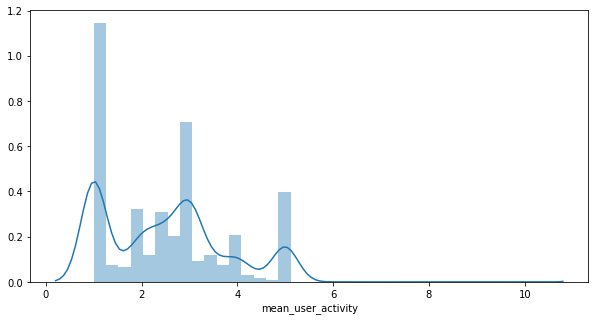

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5)) #чтобы не мучать глазки

count_plot = sns.distplot(group_data_count_mean['mean_user_activity'])

<h2><center>Различия распределений в зависимости от кампании</center></h2>


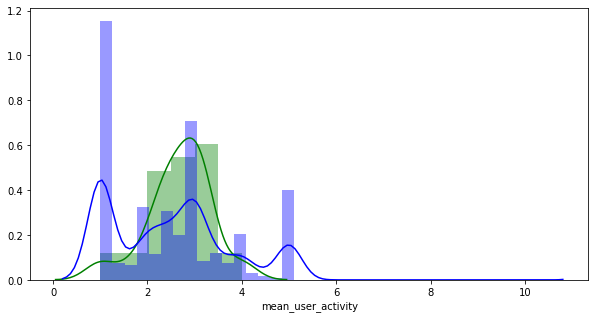

In [51]:
plt.figure(figsize=(10,5))
sns.distplot(group_data_count_mean[group_data_count_mean['media_source']=='Adstarter']['mean_user_activity'], color='green')
sns.distplot(group_data_count_mean[group_data_count_mean['media_source']=='Crossfaith']['mean_user_activity'], color='blue')

In [52]:
group_data_count_mean['media_source'].value_counts()

Crossfaith    3551
Adstarter       33
Name: media_source, dtype: int64

Распределение средних в случае Adstarter более нормализовано, чем в случае Crossfaith, хоть и количество сэмплов в первом гораздо меньше. Очень интересно.
Так же идим явные аномалии в Crossfaith в местах mean_user_activity {1, 3, 5}.

<h1>Рассмотрим подробнее, построив точечный график зависимости количества событий от уровня средней активности </h2>

In [53]:
data_counts_id = data2.groupby(['media_source', 'site_id', 'campaign', 'appsflyer_id']).count()

In [54]:
data_counts_id

event_name
media_source site_id          campaign       appsflyer_id                                 
Adstarter    AaronEsser       Playcom_US_w11 1543667539491-7244411862515843678           1
                                             1543682712096-2273780647544575536           5
                                             1543696987002-8817919170253514635           1
                                             1543747819481-3940214760510552950           4
                                             1543752346134-9112873296635459465           1
...                                                                                    ...
Crossfaith   TCH_607_47_28306 WR_And_US_CPA  1543881176166-7294799236597203396           1
             TCH_607_47_28309 WR_And_US_CPA  1543813935596-3405700343394389278           1
             TCH_607_47_28313 WR_And_US_CPA  1543725789577-836646343682732117            5
                                             1543826226891-7651519832492055359           1
             p1824            WR_And_US_CPA  1531099161524-6901947546728867915           1

[28441 rows x 1 columns]

In [55]:
num_users = group_data_count.groupby(['media_source', 'site_id', 'campaign'], as_index = False).aggregate({'num_user_activity':'count'})

In [56]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [57]:
num_users = group_data_count.groupby(['media_source', 'site_id', 'campaign'], as_index = False).count()

In [58]:
group_data_count.groupby(['media_source', 'site_id', 'campaign'], as_index = False).count()

,media_source,site_id,campaign,appsflyer_id,num_user_activity
0,Adstarter,AaronEsser,Playcom_US_w11,21,21
1,Adstarter,AliProductions,Playcom_US_w10,1,1
2,Adstarter,Avive,Playcom_DE_w2,35,35
3,Adstarter,B3nny,Playcom_DE_w2,4,4
4,Adstarter,BeastyGames,Playcom_US_w10,24,24
...,...,...,...,...,...
3579,Crossfaith,TCH_607_47_28304,WR_And_US_CPA,3,3
3580,Crossfaith,TCH_607_47_28306,WR_And_US_CPA,2,2
3581,Crossfaith,TCH_607_47_28309,WR_And_US_CPA,1,1
3582,Crossfaith,TCH_607_47_28313,WR_And_US_CPA,2,2


In [59]:
num_users.columns

Index(['media_source', 'site_id', 'campaign', 'appsflyer_id',
       'num_user_activity'],
      dtype='object')

In [60]:
num_users = num_users.rename(columns = {'num_user_activity':'num_users'})

In [61]:
num_users_series = num_users['num_users']

In [62]:
num_users_series

0       21
1        1
2       35
3        4
4       24
        ..
3579     3
3580     2
3581     1
3582     2
3583     1
Name: num_users, Length: 3584, dtype: int64

In [63]:
group_stat = pd.concat([group_data_count_mean, num_users_series], axis = 1)

In [64]:
group_stat

,media_source,site_id,campaign,mean_user_activity,num_users
0,Adstarter,AaronEsser,Playcom_US_w11,2.142857,21
1,Adstarter,AliProductions,Playcom_US_w10,1.000000,1
2,Adstarter,Avive,Playcom_DE_w2,2.257143,35
3,Adstarter,B3nny,Playcom_DE_w2,2.750000,4
4,Adstarter,BeastyGames,Playcom_US_w10,3.208333,24
...,...,...,...,...,...
3579,Crossfaith,TCH_607_47_28304,WR_And_US_CPA,2.666667,3
3580,Crossfaith,TCH_607_47_28306,WR_And_US_CPA,2.000000,2
3581,Crossfaith,TCH_607_47_28309,WR_And_US_CPA,1.000000,1
3582,Crossfaith,TCH_607_47_28313,WR_And_US_CPA,3.000000,2


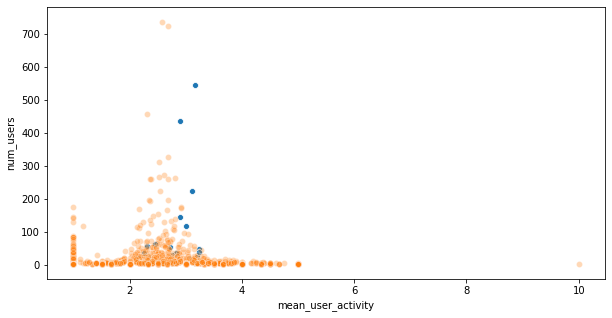

In [65]:
plt.figure(figsize=(10,5)) #чтобы не мучать глазки
sns.scatterplot(x = group_stat[group_stat['media_source']=='Adstarter']['mean_user_activity'], 
                y = group_stat['num_users'], alpha = 1)
sns.scatterplot(x = group_stat[group_stat['media_source']=='Crossfaith']['mean_user_activity'],
                y = group_stat['num_users'], alpha = 0.3)

Уже видим скопления близко к точке (0, 0) и вдоль оси mean_user_activity при малых num_users

Обрежем верхушку и исключим крайнюю точку справа (её активность связана с большим количеством внутриигровых покупок) и посмотрим более детально

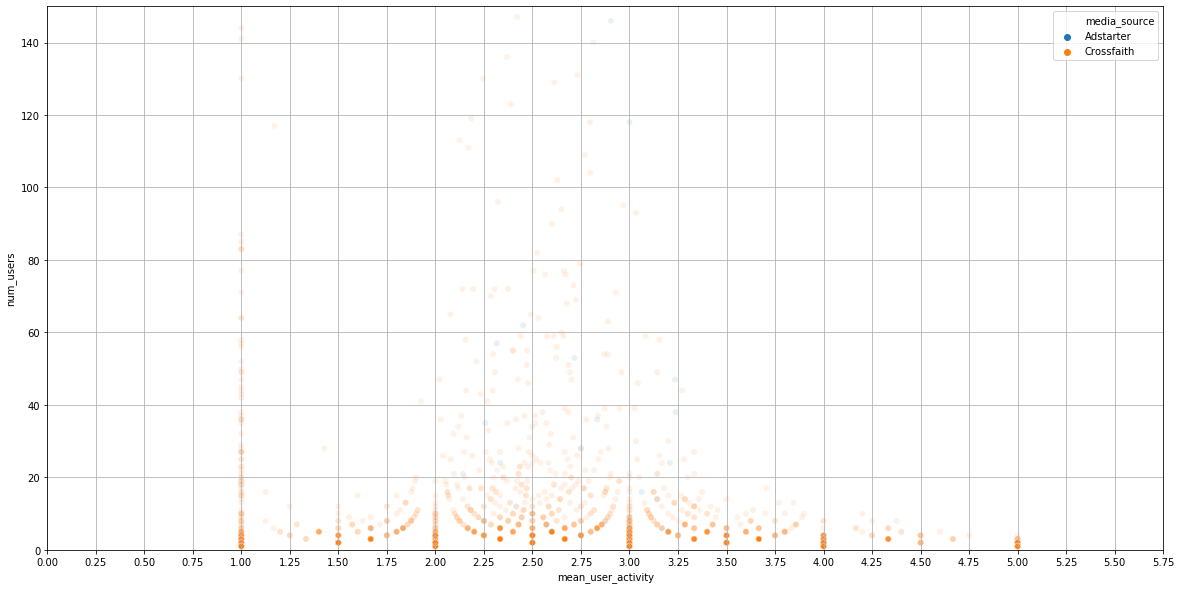

In [66]:
plt.figure(figsize=(20,10)) #чтобы не мучать глазки
graph = sns.scatterplot(x = group_stat['mean_user_activity'], y = group_stat['num_users'], hue = group_stat['media_source'], alpha = 0.1)
plt.xlim(1, 4)
plt.ylim(0, 150)
plt.grid(True)
plt.xticks(np.arange(0,6,0.25));
# graph.set_yscale('log')



Действительно, видим множество аномальных когорт, у которых "event_name_mean" равен 1 и большое количество привлечённых пользователей. То есть постинстальной активности у них никакой не было. Это однозначно фрод.


Также видим странные узоры и высокий уровень активности в когортах при низком количестве юзеров в случае Crossfaith. 
По всей видимости, узоры - либо проявление дискретности результата средних значений при низком количестве пользователей в когорте. Аномальные уплотнения, вероятно, тоже могут быть фродами.


<h2>Однозначно фродовые когорты</h2>

In [67]:
#Выделяю когорты с очень малой активностью и количеством юзеров > 10
fraud = group_stat[(group_stat['mean_user_activity'] < 1.5) & (group_stat['num_users'] > 10)]

In [68]:
fraud

,media_source,site_id,campaign,mean_user_activity,num_users
238,Crossfaith,Coach_1065,WR_And_JP_CPA,1.17094,117
243,Crossfaith,Coach_1227,WR_And_TW_CPA,1.00000,20
424,Crossfaith,Distortion_1880_524570119,WR_And_TW_CPA,1.00000,19
428,Crossfaith,Distortion_1880_539651133,WR_And_JP_CPA,1.00000,47
435,Crossfaith,Distortion_1880_554133064,WR_And_TW_CPA,1.00000,15
...,...,...,...,...,...
3517,Crossfaith,TCH_570_91_2711,WR_And_JP_CPA,1.00000,37
3518,Crossfaith,TCH_570_91_2713,WR_And_JP_CPA,1.00000,49
3526,Crossfaith,TCH_582_1300-u34j45u9gt,WR_And_JP_CPA,1.00000,19
3529,Crossfaith,TCH_582_4412-TeIW9D-CcH,WR_And_JP_CPA,1.00000,18


In [69]:
fraud.num_users.sum()

2890

В выявленных фродовых когортах 2890 пользователей